In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

df = pd.read_csv('/content/url_spam_classification.csv')

X = df['url']
y = df['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()

model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=128,
                    input_length=max_len))

model.add(LSTM(128, return_sequences=False))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.build(input_shape=(None, max_len))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139,905 (546.50 KB)

 Trainable params: 139,905 (546.50 KB)

 Non-trainable params: 0 (0.00 B)

This was the 2nd try with 10 epochs without any regularization, etc.

Earlier I tried the with 5 epochs.

In [ ]:
history = model.fit(X_train_pad, y_train,
                    validation_data=(X_test_pad, y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - accuracy: 0.9883 - loss: 0.0357 - val_accuracy: 0.9779 - val_loss: 0.0689
Epoch 2/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.9900 - loss: 0.0322 - val_accuracy: 0.9787 - val_loss: 0.0703
Epoch 3/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.9900 - loss: 0.0321 - val_accuracy: 0.9789 - val_loss: 0.0688
Epoch 4/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - accuracy: 0.9904 - loss: 0.0316 - val_accuracy: 0.9777 - val_loss: 0.0805
Epoch 5/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.9883 - loss: 0.0377 - val_accuracy: 0.9768 - val_loss: 0.0738
Epoch 6/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - accuracy: 0.9903 - loss: 0.0308 - val_accuracy: 0.9798 - val_loss: 0.0730
Epoch 7/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.9887 - loss: 0.0336 - val_accuracy: 0.9790 - val_loss: 0.0705
Epoch 8/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9908 - loss: 0

In [ ]:
# This was used with 5 epochs
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {test_acc}')

# sample data from the
new_urls = ['https://briefingday.us8.list-manage.com/unsub_confirm.html',
            'https://briefingday.com/m/v4n3i4f3',
            'https://join1440.com/',
            'https://www.theobservereffect.org/marc.html',
            'https://www.businesscasual.fm/',
            'https://www.lawfareblog.com/questions-government-bolton-book-tro-hearings']
new_urls_seq = tokenizer.texts_to_sequences(new_urls)
new_urls_pad = pad_sequences(new_urls_seq, maxlen=max_len, padding='post')

predictions = model.predict(new_urls_pad)
print(predictions)

Training & validation loss and accuracy

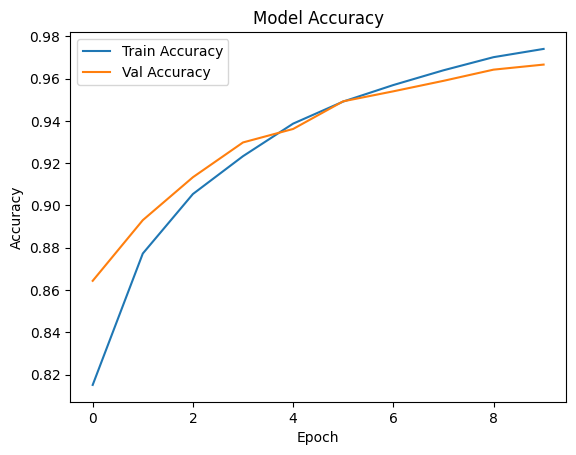

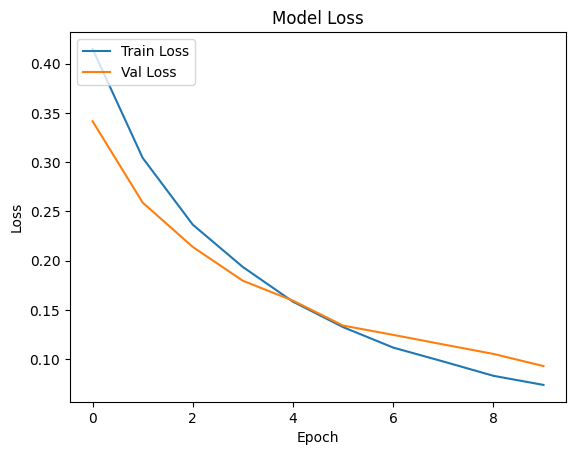

In [ ]:
import matplotlib.pyplot as plt

# accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In this graph it is shown that the validation loss increases than the training loss, meaning that the model might be slightly overfitting.

To combat this, we will try increasing the number of epochs since the validation loss is still decreasing towards the end of the graph.

Even though the validation loss is decreasing slower than the training loss, still it shows the model is learning from the data.

Since the validation loss is decreasing slowly, here we are trying earely stopping to make sure the model doesn't overfit while training.


In [ ]:
from keras.callbacks import EarlyStopping

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# retraining it with early stopping
history = model.fit(X_train_pad, y_train,
                    validation_data=(X_test_pad, y_test),
                    epochs=20,
                    batch_size=32,
                    callbacks=[early_stopping])


Epoch 1/20
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - accuracy: 0.7813 - loss: 0.4533 - val_accuracy: 0.8496 - val_loss: 0.3518
Epoch 2/20
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - accuracy: 0.8545 - loss: 0.3398 - val_accuracy: 0.8861 - val_loss: 0.2823
Epoch 3/20
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.8889 - loss: 0.2720 - val_accuracy: 0.9111 - val_loss: 0.2305
Epoch 4/20
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9155 - loss: 0.2089 - val_accuracy: 0.9302 - val_loss: 0.1772
Epoch 5/20
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9329 - loss: 0.1693 - val_accuracy: 0.9335 - val_loss: 0.1637
Epoch 6/20
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.9421 - loss: 0.1435 - val_accuracy: 0.9433 - val_loss: 0.1407
Epoch 7/20
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9522 - loss: 0.1218 - val_accuracy: 0.9538 - val_loss: 0.1253
Epoch 8/20
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.9601 - loss: 0

## Loss curves

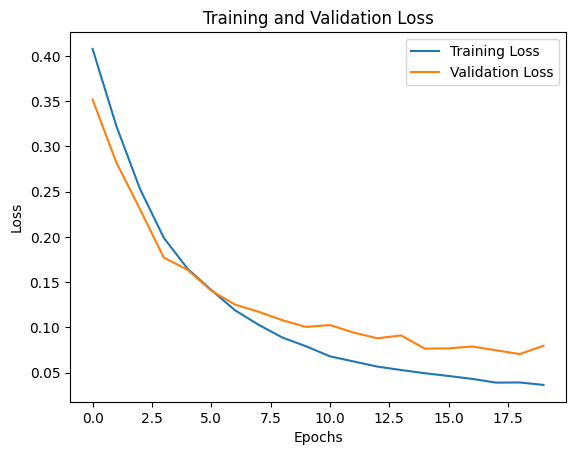

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Accurcacy curves

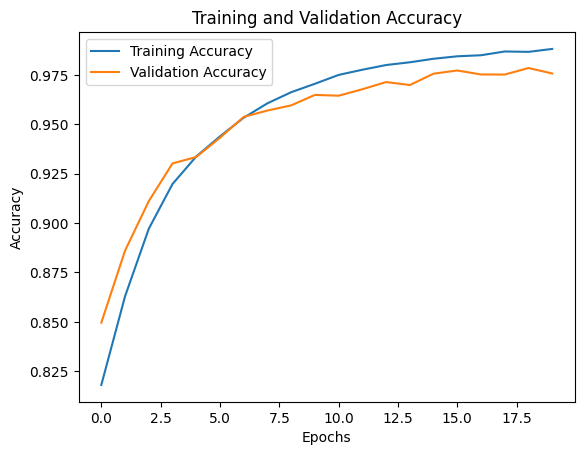

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## The accuracy of the model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

927/927 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9783 - loss: 0.0731
Test Loss: 0.07062461227178574, Test Accuracy: 0.9785914421081543


## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Spam", "Spam"], yticklabels=["Non-Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for class 1 (spam)
y_pred_prob = model.predict(X_test_pad)

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_proba'